In [3]:
#Importing the reqired datasets
import pandas as pd
import numpy as np
import math
from scipy import stats


In [4]:
#Reading the air-quality data and starting to pre-process the data
aq=pd.read_csv('air_quality.csv')

aq['date']=pd.to_datetime(aq['date']).dt.date
aq=aq.replace(' ', np.nan)
aq[' pm25']=pd.to_numeric(aq[' pm25'])
aq[' pm10']=pd.to_numeric(aq[' pm10'])
aq[' o3']=pd.to_numeric(aq[' o3'])
aq[' no2']=pd.to_numeric(aq[' no2'])
aq[' so2']=pd.to_numeric(aq[' so2'])
aq[' co']=pd.to_numeric(aq[' co'])
print(aq.dtypes)

aq.dropna(how='all')

date      object
 pm25    float64
 pm10    float64
 o3      float64
 no2     float64
 so2     float64
 co      float64
dtype: object


,date,pm25,pm10,o3,no2,so2,co
0,2021-01-03,45.0,17.0,12.0,2.0,13.0,NaN
1,2021-02-03,17.0,14.0,12.0,2.0,NaN,NaN
2,2021-03-03,8.0,17.0,11.0,2.0,NaN,NaN
3,2021-04-03,9.0,18.0,14.0,2.0,NaN,NaN
4,2021-05-03,30.0,23.0,14.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...
2609,2015-08-02,NaN,NaN,14.0,NaN,2.0,1.0
2610,2014-08-23,NaN,NaN,19.0,1.0,NaN,NaN
2611,2014-04-17,NaN,NaN,18.0,2.0,5.0,1.0
2612,2013-12-31,NaN,NaN,4.0,7.0,NaN,1.0


In [5]:
#Reading the weather data and starting to pre-process the data
wth2=pd.read_csv('weather-stations-city-of-geelong.csv',sep=';',parse_dates=[15])
wth2=wth2.dropna(how='all')
wth2=wth2.dropna(subset=['AirTemp [°C]'])
wth2['Time']=pd.to_datetime(wth2['Time'], infer_datetime_format = 'TRUE',utc='TRUE').dt.date
print(wth2.head)


<bound method NDFrame.head of           Device ID         Device name          Device location keep_record  \
56      atmos22ee02  Weather Atmos ee02  -38.1861465,144.3938752           Y   
86      atmos22ee01  Weather Atmos ee01  -38.1456638,144.3587789           Y   
126     atmos22ee02  Weather Atmos ee02  -38.1861465,144.3938752           Y   
127     atmos22ee02  Weather Atmos ee02  -38.1861465,144.3938752           Y   
129     atmos22ee02  Weather Atmos ee02  -38.1861465,144.3938752           Y   
...             ...                 ...                      ...         ...   
160375  atmos22ae02  Weather Atmos ae02  -38.1220226,144.3591414           Y   
160376  atmos22ee02  Weather Atmos ee02  -38.1861465,144.3938752           Y   
160377  atmos22ee01  Weather Atmos ee01  -38.1456638,144.3587789           Y   
160378  atmos22ee01  Weather Atmos ee01  -38.1456638,144.3587789           Y   
160379  atmos22ae02  Weather Atmos ae02  -38.1220226,144.3591414           Y   

        A

In [6]:
#Getting the first date for air-quality and weather data
print(min(wth2['Time']))
print(min(aq['date']))


2019-06-18
2013-12-31


In [7]:
#Getting the last date for air-quality and weather data
print(max(wth2['Time']))
print(max(aq['date']))
#print(max(wth['Date']))
wth2=wth2.rename(columns={'Time':'Date'})
aq=aq.rename(columns={'date':'Date'})

2021-03-25
2021-12-03


In [8]:
#Merging the air-quality and weather data on the basis of dates for further analysis
md=pd.merge(aq,wth2,how='inner', on='Date')
md=md.replace(' ', np.nan)
md=md.dropna(subset=[' pm25', ' pm10'])
print(md)

              Date   pm25   pm10    o3   no2   so2   co    Device ID  \
0       2021-01-03   45.0   17.0  12.0   2.0  13.0  NaN  atmos22ee01   
1       2021-01-03   45.0   17.0  12.0   2.0  13.0  NaN  atmos22ee02   
2       2021-01-03   45.0   17.0  12.0   2.0  13.0  NaN  atmos22ee01   
3       2021-01-03   45.0   17.0  12.0   2.0  13.0  NaN  atmos22ee02   
4       2021-01-03   45.0   17.0  12.0   2.0  13.0  NaN  atmos22ee01   
...            ...    ...    ...   ...   ...   ...  ...          ...   
133735  2019-08-03   27.0   38.0  37.0   7.0   2.0  2.0  atmos22ee01   
133736  2019-08-03   27.0   38.0  37.0   7.0   2.0  2.0  atmos22ee02   
133737  2019-08-03   27.0   38.0  37.0   7.0   2.0  2.0  atmos22ee01   
133738  2019-08-03   27.0   38.0  37.0   7.0   2.0  2.0  atmos22ee02   
133739  2019-08-03   27.0   38.0  37.0   7.0   2.0  2.0  atmos22ee01   

               Device name          Device location  ... RelativeHumidity [%]  \
0       Weather Atmos ee01  -38.1456638,144.3587789  .

In [9]:
#Calculating the Air-quality index
md['AQI(25)']=md[' pm25']*4
md['AQI(10)']=md[' pm10']*2
print(md.head())

         Date   pm25   pm10    o3   no2   so2   co    Device ID  \
0  2021-01-03   45.0   17.0  12.0   2.0  13.0  NaN  atmos22ee01   
1  2021-01-03   45.0   17.0  12.0   2.0  13.0  NaN  atmos22ee02   
2  2021-01-03   45.0   17.0  12.0   2.0  13.0  NaN  atmos22ee01   
3  2021-01-03   45.0   17.0  12.0   2.0  13.0  NaN  atmos22ee02   
4  2021-01-03   45.0   17.0  12.0   2.0  13.0  NaN  atmos22ee01   

          Device name          Device location  ... Strike Distance  Strikes  \
0  Weather Atmos ee01  -38.1456638,144.3587789  ...             0.0      0.0   
1  Weather Atmos ee02  -38.1861465,144.3938752  ...             0.0      0.0   
2  Weather Atmos ee01  -38.1456638,144.3587789  ...             0.0      0.0   
3  Weather Atmos ee02  -38.1861465,144.3938752  ...             0.0      0.0   
4  Weather Atmos ee01  -38.1456638,144.3587789  ...             0.0      0.0   

   VapourPressure [hPa]  WindDirection [°]  Wind Speed  Year  Month  \
0                  2.08              217.3   

In [10]:
#Printing information about the merged data
print(md.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130440 entries, 0 to 133739
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date                       130440 non-null  object 
 1    pm25                      130440 non-null  float64
 2    pm10                      130440 non-null  float64
 3    o3                        130440 non-null  float64
 4    no2                       122014 non-null  float64
 5    so2                       29334 non-null   float64
 6    co                        77968 non-null   float64
 7   Device ID                  130440 non-null  object 
 8   Device name                130440 non-null  object 
 9   Device location            130440 non-null  object 
 10  keep_record                130440 non-null  object 
 11  AirTemp [°C]               130440 non-null  float64
 12  AtmosphericPressure [hPa]  88458 non-null   float64
 13  GustSpeed [km/h]           13

In [11]:
#Dropping the irrevelant columns from the data
md=md.drop(columns=['Device ID','Device name','Device location','Device location','keep_record','dayofweek'])
print(md)

              Date   pm25   pm10    o3   no2   so2   co  AirTemp [°C]  \
0       2021-01-03   45.0   17.0  12.0   2.0  13.0  NaN          18.2   
1       2021-01-03   45.0   17.0  12.0   2.0  13.0  NaN          20.6   
2       2021-01-03   45.0   17.0  12.0   2.0  13.0  NaN          18.7   
3       2021-01-03   45.0   17.0  12.0   2.0  13.0  NaN          21.1   
4       2021-01-03   45.0   17.0  12.0   2.0  13.0  NaN          18.9   
...            ...    ...    ...   ...   ...   ...  ...           ...   
133735  2019-08-03   27.0   38.0  37.0   7.0   2.0  2.0          14.8   
133736  2019-08-03   27.0   38.0  37.0   7.0   2.0  2.0           9.2   
133737  2019-08-03   27.0   38.0  37.0   7.0   2.0  2.0          15.0   
133738  2019-08-03   27.0   38.0  37.0   7.0   2.0  2.0          10.2   
133739  2019-08-03   27.0   38.0  37.0   7.0   2.0  2.0          16.2   

        AtmosphericPressure [hPa]  GustSpeed [km/h]  ...  Solar [W/m2]  \
0                          100.60              2.

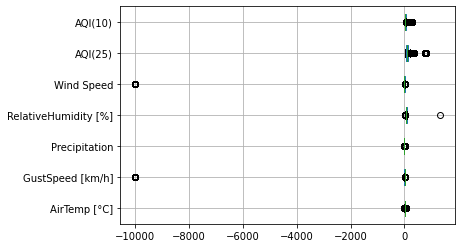

In [12]:
#Visualising each feature using boxplot to check for outliers
md[['AirTemp [°C]','GustSpeed [km/h]','Precipitation','RelativeHumidity [%]','Wind Speed','AQI(25)','AQI(10)']].plot.box(vert = False, grid = True)


Outlier Detection and removal 

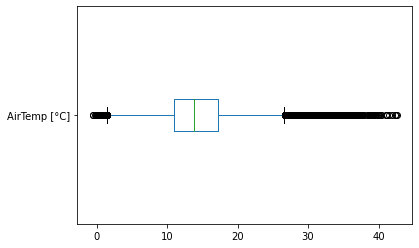

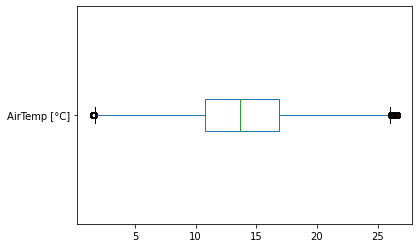

In [13]:
md[['AirTemp [°C]']].plot.box(vert=False)
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range
l,u = outlier_treatment(md['AirTemp [°C]'])
md.drop(md[ (md['AirTemp [°C]'] > u) | (md['AirTemp [°C]'] < l) ].index , inplace=True)
md[['AirTemp [°C]']].plot.box(vert=False)

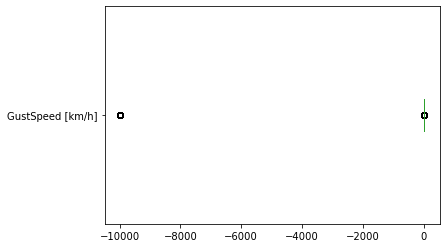

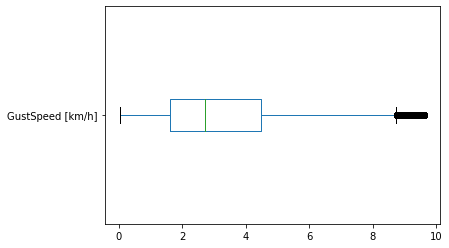

In [14]:
md[['GustSpeed [km/h]']].plot.box(vert=False)
l,u = outlier_treatment(md['GustSpeed [km/h]'])
md.drop(md[ (md['GustSpeed [km/h]'] > u) | (md['GustSpeed [km/h]'] < l) ].index , inplace=True)
md[['GustSpeed [km/h]']].plot.box(vert=False)

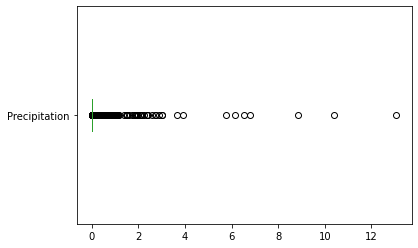

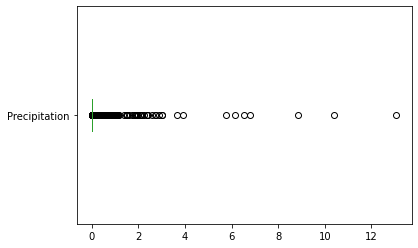

In [15]:
md[['Precipitation']].plot.box(vert=False)
l,u = outlier_treatment(md['Precipitation'])
md.drop(md[ (md['Precipitation'] > u) | (md['Precipitation'] < l) ].index , inplace=True)
md[['Precipitation']].plot.box(vert=False)

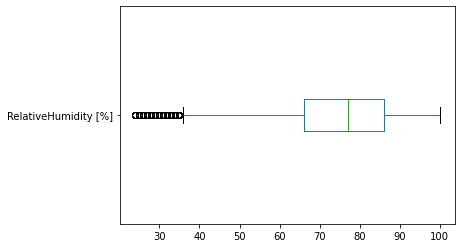

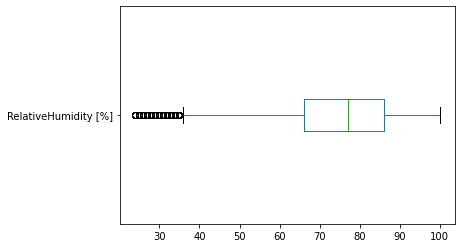

In [16]:
md[['RelativeHumidity [%]']].plot.box(vert=False)
l,u = outlier_treatment(md['RelativeHumidity [%]'])
md.drop(md[ (md['RelativeHumidity [%]'] > u) | (md['RelativeHumidity [%]'] < l) ].index , inplace=True)
md[['RelativeHumidity [%]']].plot.box(vert=False)

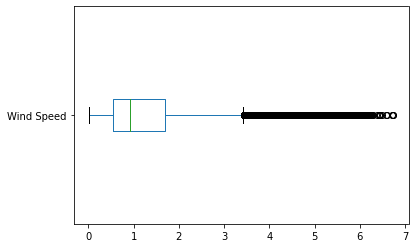

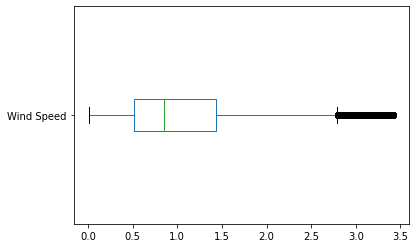

In [17]:
md[['Wind Speed']].plot.box(vert=False)
l,u = outlier_treatment(md['Wind Speed'])
md.drop(md[ (md['Wind Speed'] > u) | (md['Wind Speed'] < l) ].index , inplace=True)
md[['Wind Speed']].plot.box(vert=False)

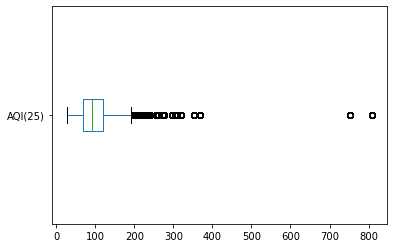

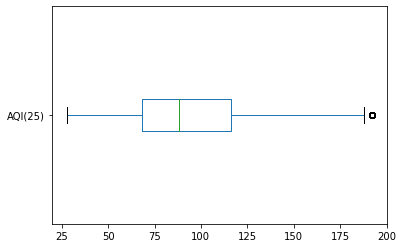

In [18]:
md[['AQI(25)']].plot.box(vert=False)
l,u = outlier_treatment(md['AQI(25)'])
md.drop(md[ (md['AQI(25)'] > u) | (md['AQI(25)'] < l) ].index , inplace=True)
md[['AQI(25)']].plot.box(vert=False)

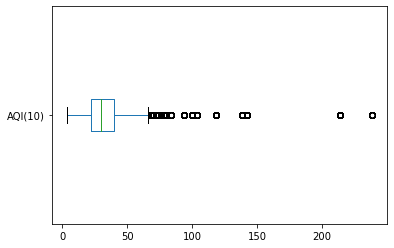

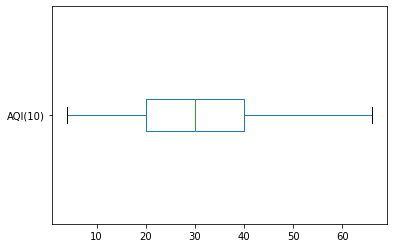

In [19]:
md[['AQI(10)']].plot.box(vert=False)
l,u = outlier_treatment(md['AQI(10)'])
md.drop(md[ (md['AQI(10)'] > u) | (md['AQI(10)'] < l) ].index , inplace=True)
md[['AQI(10)']].plot.box(vert=False)

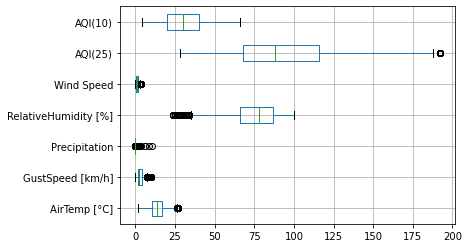

In [20]:
#visualising each feature after outlier removal
md[['AirTemp [°C]','GustSpeed [km/h]','Precipitation','RelativeHumidity [%]','Wind Speed','AQI(25)','AQI(10)']].plot.box(vert = False, grid = True)


In [21]:
#Visualising the correlations
corr = md[['AirTemp [°C]','GustSpeed [km/h]','Precipitation','RelativeHumidity [%]','Wind Speed','AQI(25)','AQI(10)']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,AirTemp [°C],GustSpeed [km/h],Precipitation,RelativeHumidity [%],Wind Speed,AQI(25),AQI(10)
AirTemp [°C],1.00,0.10,0.00,-0.67,0.00,0.08,0.15
GustSpeed [km/h],0.10,1.00,0.02,-0.16,0.83,-0.02,-0.07
Precipitation,0.00,0.02,1.00,0.05,0.01,0.00,-0.03
RelativeHumidity [%],-0.67,-0.16,0.05,1.00,-0.02,-0.04,-0.07
Wind Speed,0.00,0.83,0.01,-0.02,1.00,-0.02,-0.05
AQI(25),0.08,-0.02,0.00,-0.04,-0.02,1.00,0.23
AQI(10),0.15,-0.07,-0.03,-0.07,-0.05,0.23,1.00


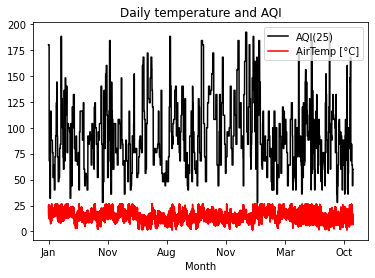

In [22]:
#Visualising the variation of AQI and Airtemp with time
ax = md.plot.line(x = 'Month', y = 'AQI(25)', color = 'black')
md.plot.line(x = 'Month', y = 'AirTemp [°C]', 
                             color = 'red', title = 'Daily temperature and AQI', ax = ax)

In [23]:
#Dropping the insignificant features
md1=md

md1=md1.drop([' pm25',' pm10'],axis=1)

In [24]:
md1=md1.groupby(['Date']).mean()
print(md1.info(),md1)


<class 'pandas.core.frame.DataFrame'>
Index: 519 entries, 2019-06-18 to 2021-03-14
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0    o3                        519 non-null    float64
 1    no2                       488 non-null    float64
 2    so2                       131 non-null    float64
 3    co                        308 non-null    float64
 4   AirTemp [°C]               519 non-null    float64
 5   AtmosphericPressure [hPa]  519 non-null    float64
 6   GustSpeed [km/h]           519 non-null    float64
 7   Precipitation              519 non-null    float64
 8   RelativeHumidity [%]       519 non-null    float64
 9   Solar [W/m2]               519 non-null    float64
 10  Strike Distance            519 non-null    float64
 11  Strikes                    519 non-null    float64
 12  VapourPressure [hPa]       519 non-null    float64
 13  WindDirection [°]          519 non-null

In [25]:
#Splitting the Dataset into training and testing
trdt=md1[md1['Year']<=2020]
tsdt=md1[md1['Year']>2020]
print(trdt.info(),tsdt.info())

<class 'pandas.core.frame.DataFrame'>
Index: 477 entries, 2019-06-18 to 2020-12-31
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0    o3                        477 non-null    float64
 1    no2                       454 non-null    float64
 2    so2                       109 non-null    float64
 3    co                        296 non-null    float64
 4   AirTemp [°C]               477 non-null    float64
 5   AtmosphericPressure [hPa]  477 non-null    float64
 6   GustSpeed [km/h]           477 non-null    float64
 7   Precipitation              477 non-null    float64
 8   RelativeHumidity [%]       477 non-null    float64
 9   Solar [W/m2]               477 non-null    float64
 10  Strike Distance            477 non-null    float64
 11  Strikes                    477 non-null    float64
 12  VapourPressure [hPa]       477 non-null    float64
 13  WindDirection [°]          477 non-null

In [26]:
#Import libraries for modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error

<ipython-input-27-843ca021b481>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain, ytrain)


Feature: 0, Score: 0.09165
Feature: 1, Score: 0.09942
Feature: 2, Score: 0.10031
Feature: 3, Score: 0.08160
Feature: 4, Score: 0.05841
Feature: 5, Score: 0.09695
Feature: 6, Score: 0.12715
Feature: 7, Score: 0.02693
Feature: 8, Score: 0.02211
Feature: 9, Score: 0.09012
Feature: 10, Score: 0.11251
Feature: 11, Score: 0.08657
Feature: 12, Score: 0.00626


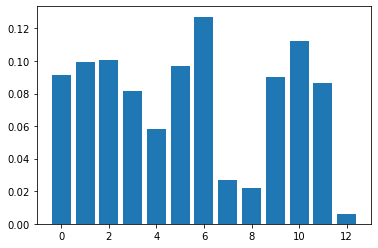

Index([' o3', ' no2', ' so2', ' co', 'AirTemp [°C]',
       'AtmosphericPressure [hPa]', 'GustSpeed [km/h]', 'Precipitation',
       'RelativeHumidity [%]', 'Solar [W/m2]', 'Strike Distance', 'Strikes',
       'VapourPressure [hPa]', 'WindDirection [°]', 'Wind Speed', 'Year',
       'AQI(25)', 'AQI(10)'],
      dtype='object')


In [27]:
#Finding the important features according to randomforestregressor
ytrain=trdt[['AQI(25)']].reset_index(drop=True)
xtrain=trdt.drop(['AQI(25)','AQI(10)',' no2',' co',' so2'],axis=1)
ytest=tsdt[['AQI(25)']].reset_index(drop=True)
xtest=tsdt.drop(['AQI(25)','AQI(10)',' no2',' co',' so2'],axis=1)
#xtrain, xtest, ytrain, ytest = train_test_split(md1.drop(['AQI(25)','AQI(10)',' no2',' co',' so2'],axis=1), md1[['AQI(25)']], test_size=0.70, random_state=30)
model = RandomForestRegressor()
model.fit(xtrain, ytrain)
importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
print(md1.columns)

In [28]:
#drop no2, so2, co, airtemp, atmos, precip, r humidi, str dist, str, vp, year as not relavant in this model
xtest=xtest.drop(['AirTemp [°C]','AtmosphericPressure [hPa]','Precipitation','RelativeHumidity [%]','Solar [W/m2]', 'Strike Distance', 'Strikes',
       'VapourPressure [hPa]','Year'],axis=1)
xtrain=xtrain.drop(['AirTemp [°C]','AtmosphericPressure [hPa]','Precipitation','RelativeHumidity [%]','Solar [W/m2]', 'Strike Distance', 'Strikes',
       'VapourPressure [hPa]','Year'],axis=1)
model = RandomForestRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

#R2 score and mse for the model
print(r2_score(ytest,ypred))
print(mse(ytest,ypred))


<ipython-input-28-bf86733fc294>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain, ytrain)


-0.040874201523073195
1328.9957333333334


In [29]:
#RMSE for the model
rms = mean_squared_error(ytest, ypred, squared=False)
print(rms)

36.45539374815932
